# Getting started with INTEGRATE

This notebook contains a simple example of geeting started with INTEGRATE

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    #%load_ext autoreload
    #%autoreload 2
    pass

In [2]:
import integrate as ig

In [3]:
# If os is not UNIX then set paralell to True
import os
if os.name == 'nt':
    parallel = False
else:
    parallel = True
print("OS=%s, Parallel=%s " % (os.name,parallel))

OS=posix, Parallel=True 


In [4]:
case = 'DAUGAARD'

files = ig.get_case_data(case=case)
f_data_h5 = files[0]
f_data_h5 = 'DAUGAARD_AVG.h5'
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
Checking if file exists on the remote server...
Downloaded DAUGAARD_AVG.h5
Checking if file exists on the remote server...
Downloaded TX07_20231016_2x4_RC20-33.gex
Checking if file exists on the remote server...
Downloaded README_DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model ($\rho(\mathbf{m},\mathbf{d})$

In this example a simple layered prior model will be considered

### 1a. first, a sample of the prior model parameters, $\rho(\mathbf{m})$, will be generated

100%|█████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 26757.43it/s]
/home/tmeha/space/PROGRAMMING/integrate_module/integrate/integrate_plot.py:984: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(['$10^{%3.1f}$'%i for i in ax[0,1].get_xticks()])


Saving prior model to PRIOR_CHI2_NF_3_log-uniform_N10000.h5


/home/tmeha/space/PROGRAMMING/integrate_module/integrate/integrate_plot.py:984: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(['$10^{%3.1f}$'%i for i in ax[0,1].get_xticks()])


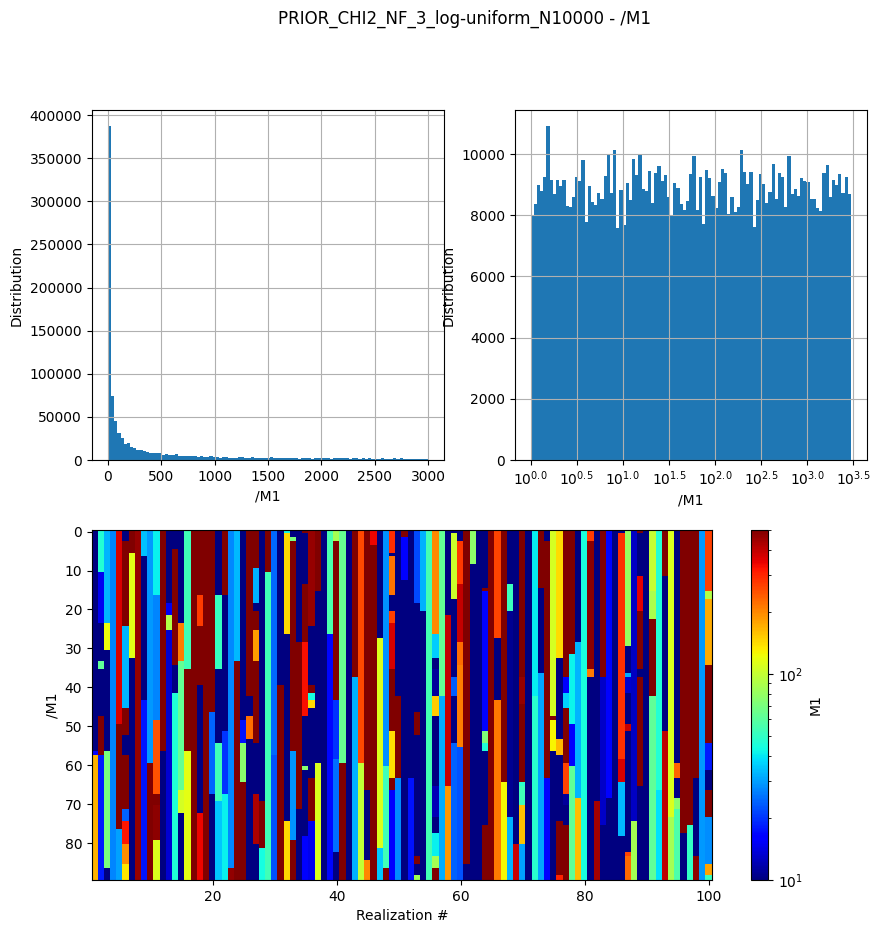

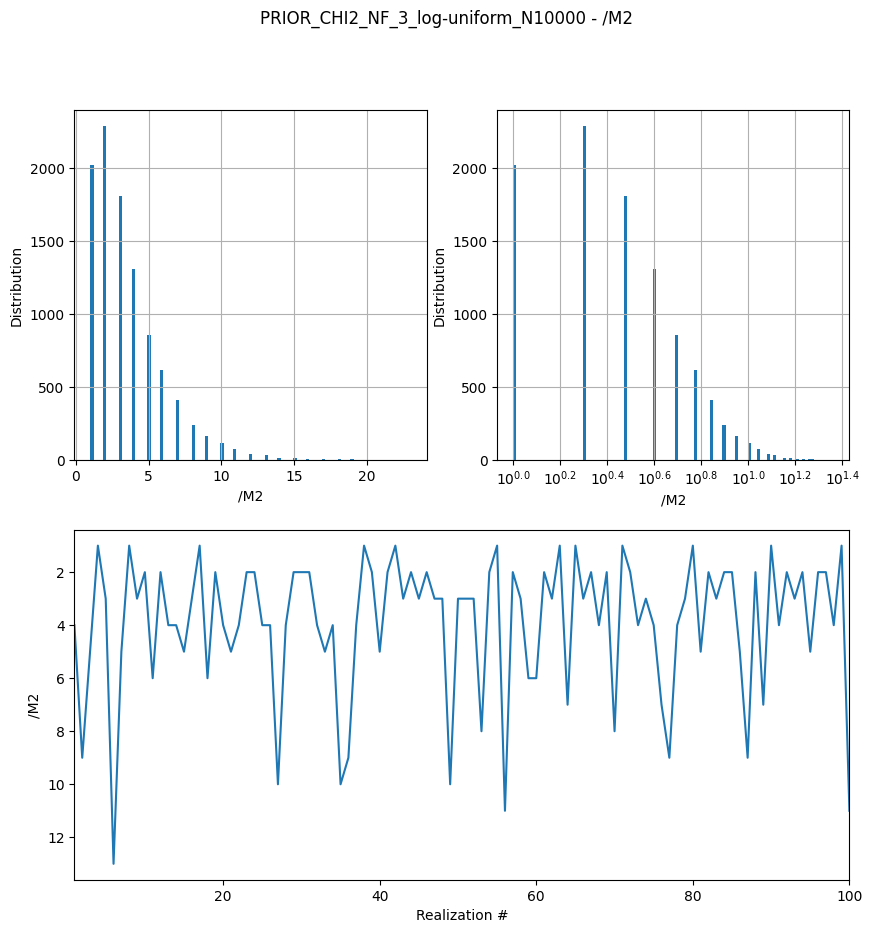

In [5]:
N=100000
# Layered model
f_prior_h5 = ig.prior_model_layered(N=N,lay_dist='chi2', NLAY_deg=3, RHO_min=1, RHO_max=3000)
# WorkBench type layered model
#f_prior_h5 = ig.prior_model_workbench(N=N,RHO_dist='chi2', nlayers=5)

# Plot some summary statistics of the prior model
ig.plot_prior_stats(f_prior_h5)

### 1b. Then, a corresponding sample of $\rho(\mathbf{d})$, will be generated

In [6]:
f_prior_data_h5 = ig.prior_data_gaaem(f_prior_h5, file_gex, parallel=parallel)

N=10000, N_in=10000
Creating a copy of PRIOR_CHI2_NF_3_log-uniform_N10000.h5 as PRIOR_CHI2_NF_3_log-uniform_N10000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
Trying to copy PRIOR_CHI2_NF_3_log-uniform_N10000.h5 to PRIOR_CHI2_NF_3_log-uniform_N10000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5


100%|████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:13<00:00, 11.89it/s]


Concatenating D_chunks
D.shape (10000, 40)
Time elapsed:  14.5 s, for 10000 soundings. 1.451 ms/sounding. 689.0it/s


## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [7]:
N_use = N
f_post_h5 = ig.integrate_rejection(f_prior_data_h5, 
                                   f_data_h5, 
                                   N_use = N_use, 
                                   updatePostStat=False, 
                                   showInfo=1, 
                                   parallel=parallel)

Ncpu=0
Number of data points: 11693 (available), 11693 (used). Nchunks=32, Ncpu=32


100%|████████████████████████████████████████████████████████████████████████████████████████████| 366/366 [00:11<00:00, 30.61it/s]


T_av=128.4, Time= 12.3s/11693 soundings , 1.1ms/sounding, 948.8it/s


In [8]:
ig.integrate_posterior_stats(f_post_h5)

D1
M1
M2
Creating /M1/Mean
Creating /M1/Median
Creating /M1/Std


100%|███████████████████████████████████████████████████████████████████████████████████████| 11693/11693 [00:12<00:00, 966.44it/s]


Creating /M2/Mean
Creating /M2/Median
Creating /M2/Std


100%|█████████████████████████████████████████████████████████████████████████████████████| 11693/11693 [00:01<00:00, 10083.60it/s]


### Plot some statistic from $\sigma(\mathbf{m})$

i_use[0]=6453
6453
10000
47.79692151263294
i_use[0]=4982
4982
10000
103.18907539165541


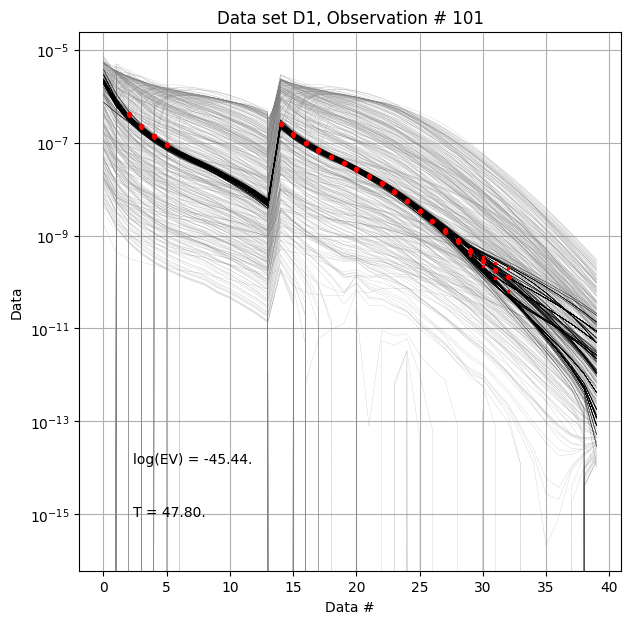

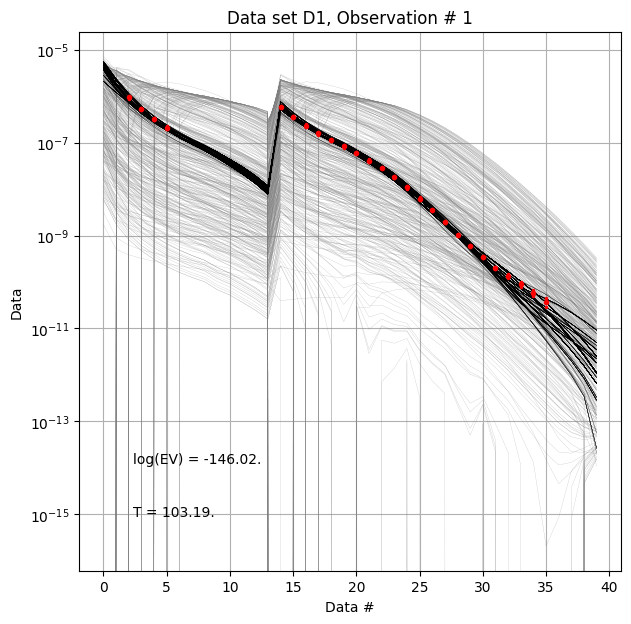

In [9]:
ig.plot_data_prior_post(f_post_h5, i_plot=100)
ig.plot_data_prior_post(f_post_h5, i_plot=0)

(1, 100)


1

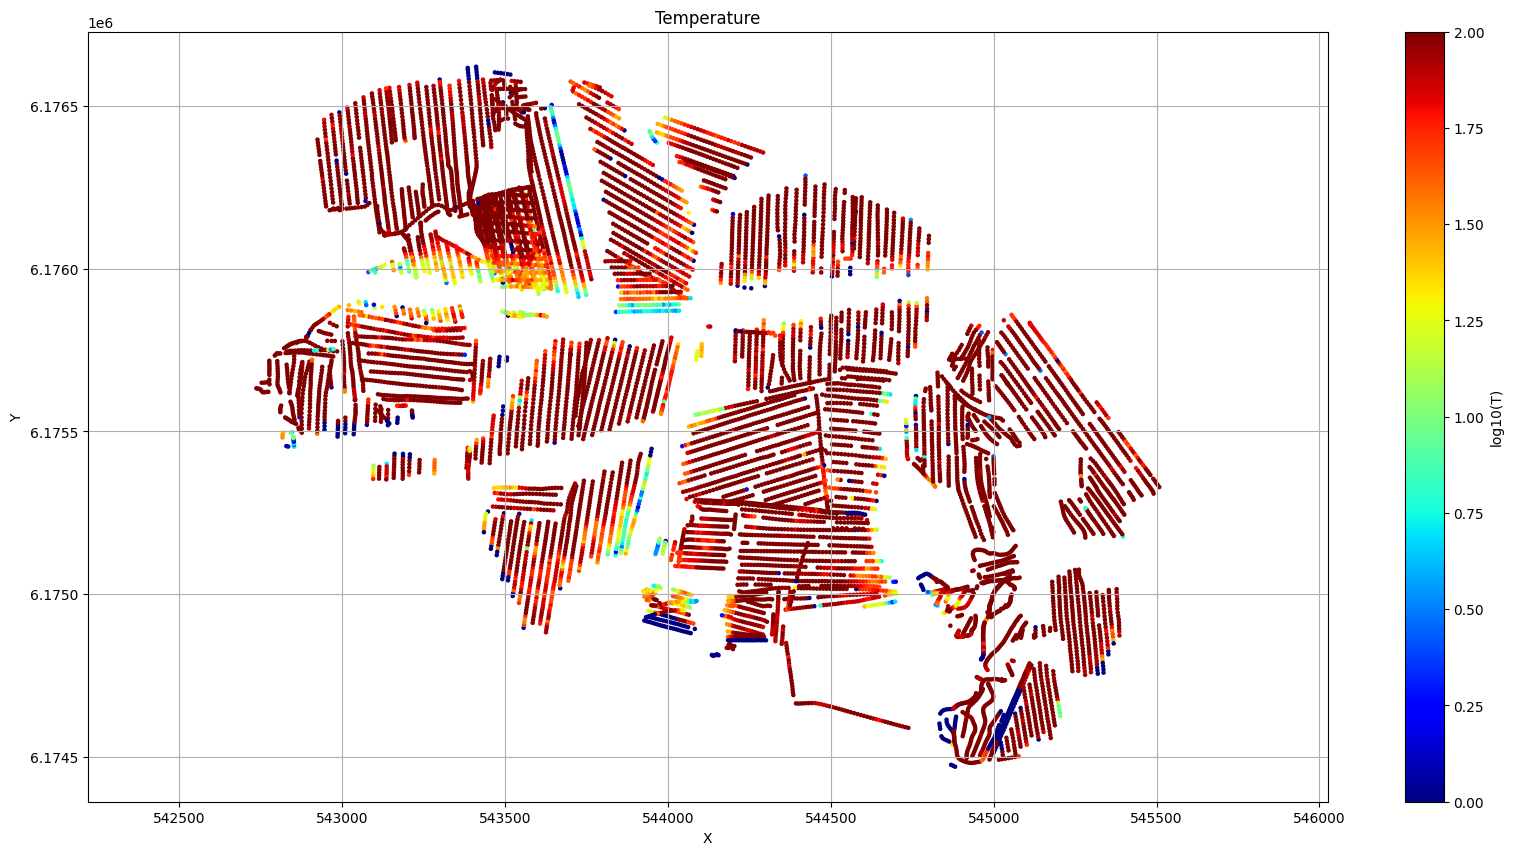

In [10]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='T')

1
Plotting profile /M1 from POST_DAUGAARD_AVG_PRIOR_CHI2_NF_3_log-uniform_N10000_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu10000_aT1.h5
[10, 500]
jet
[10, 500]


/home/tmeha/space/PROGRAMMING/integrate_module/integrate/integrate_plot.py:588: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im1 = ax[0].pcolormesh(ID[:,i1:i2], ZZ[:,i1:i2], Mean[:,i1:i2],
/home/tmeha/space/PROGRAMMING/integrate_module/integrate/integrate_plot.py:597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im2 = ax[1].pcolormesh(ID[:,i1:i2], ZZ[:,i1:i2], Median[:,i1:i2],
/home/tmeha/space/PROGRAMMING/integrate_module/integrate/integrate_plot.py:607: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decr

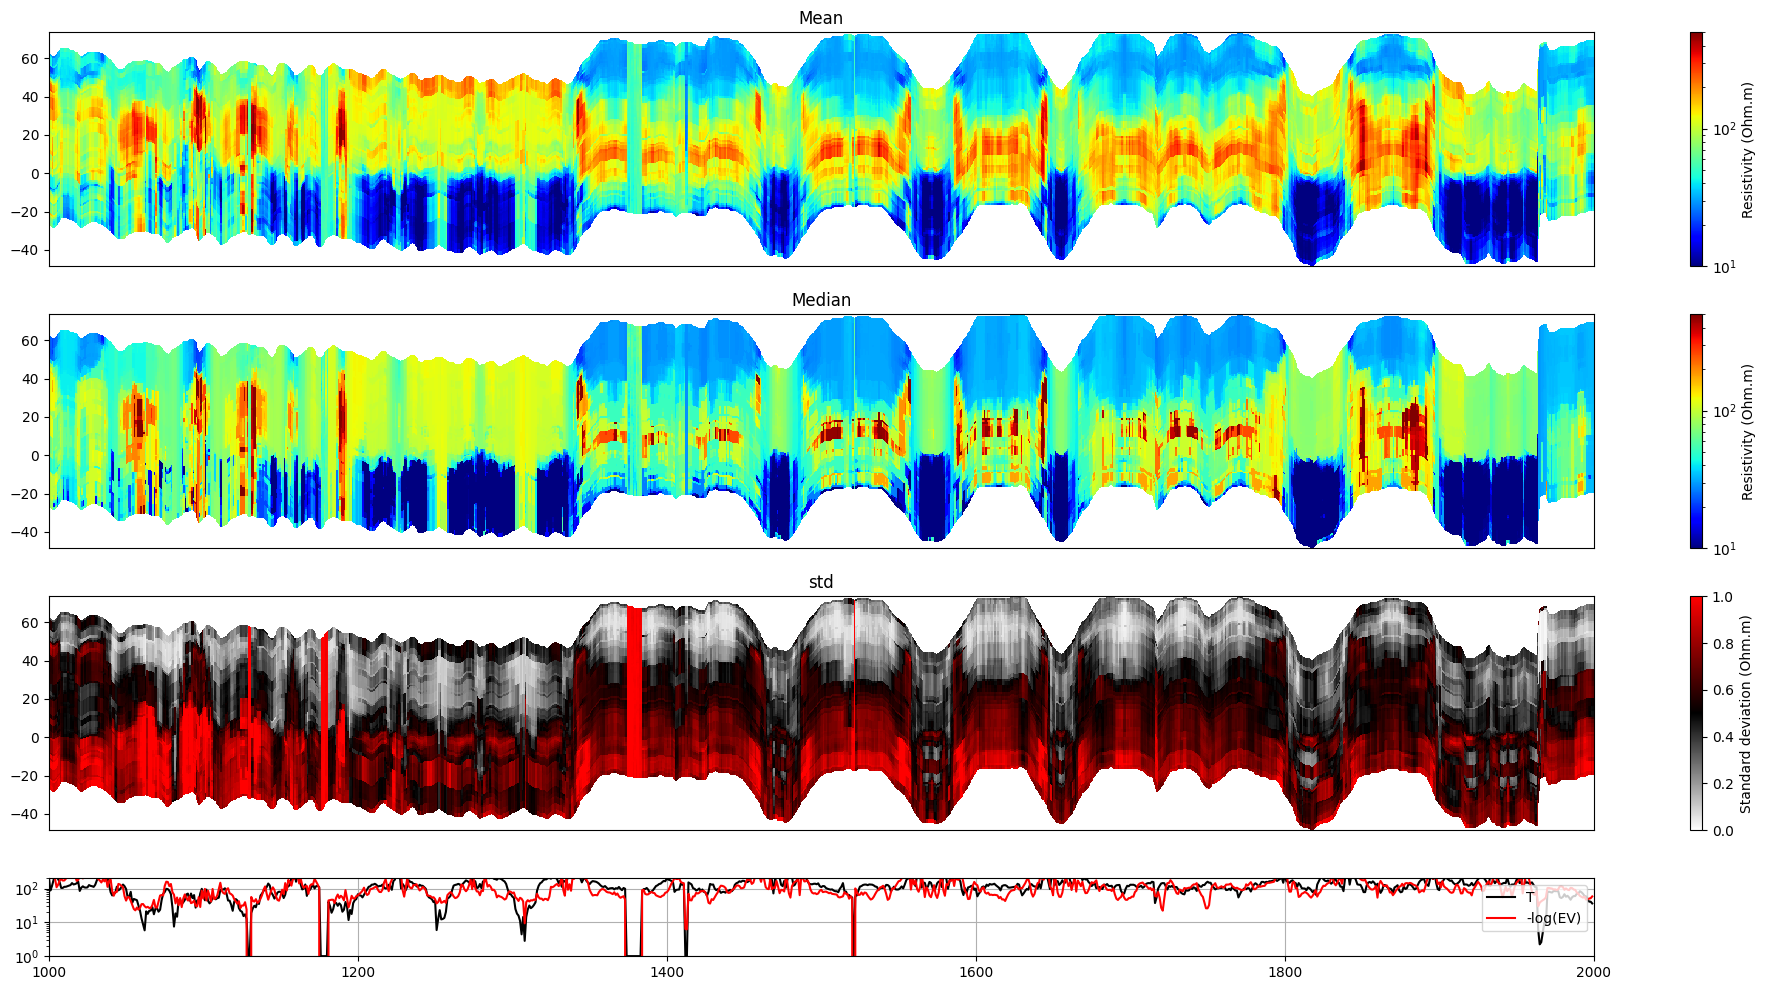

In [11]:
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1)

PRIOR_CHI2_NF_3_log-uniform_N10000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
[10, 500]
jet
Plotting Feature 12 from /M1/Median
(11693,)


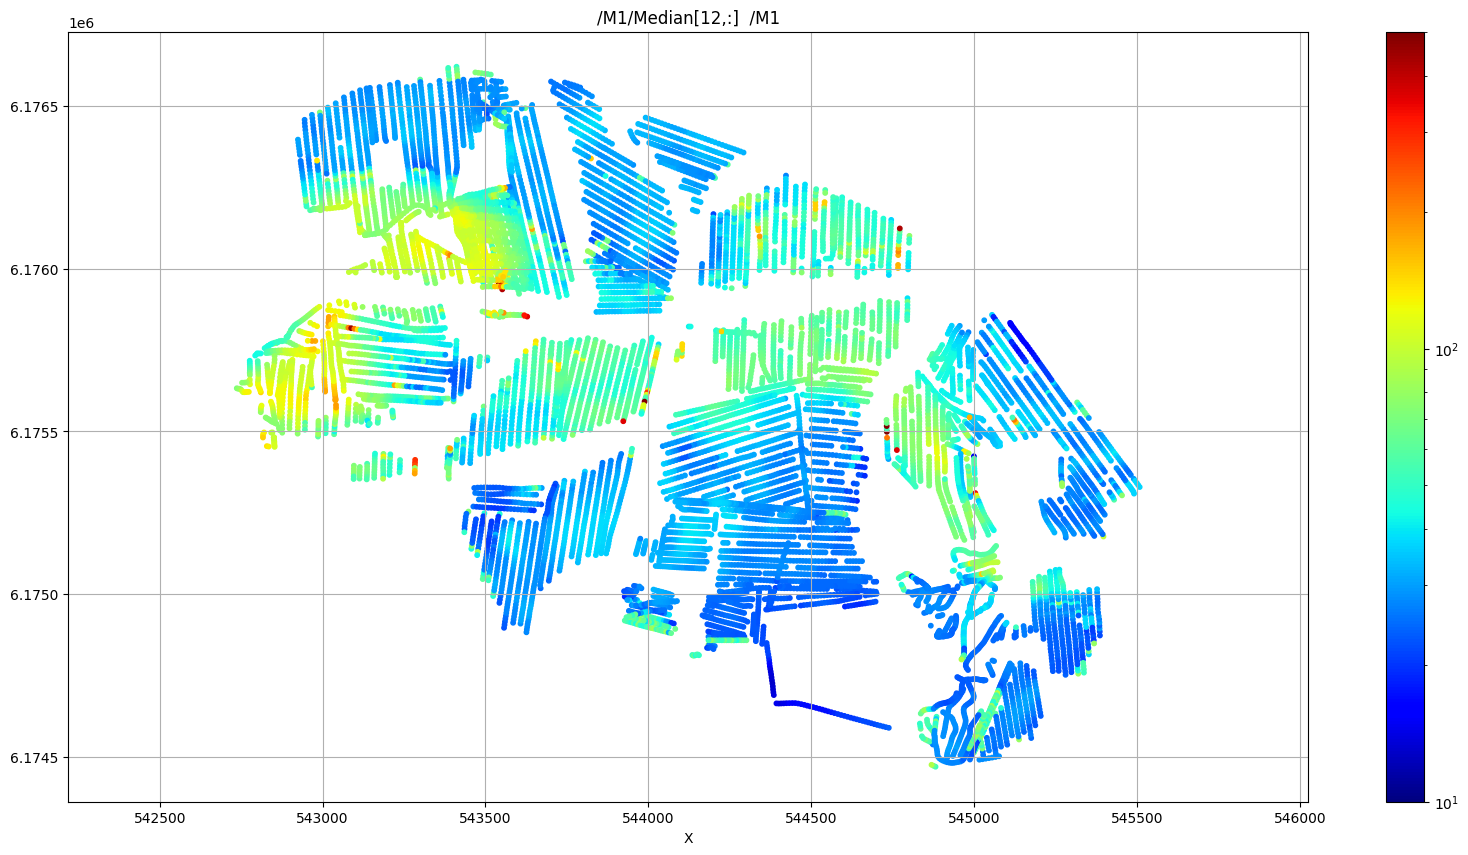

PRIOR_CHI2_NF_3_log-uniform_N10000_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
[1, 6]
jet
Plotting Feature 0 from /M2/Median
(11693,)


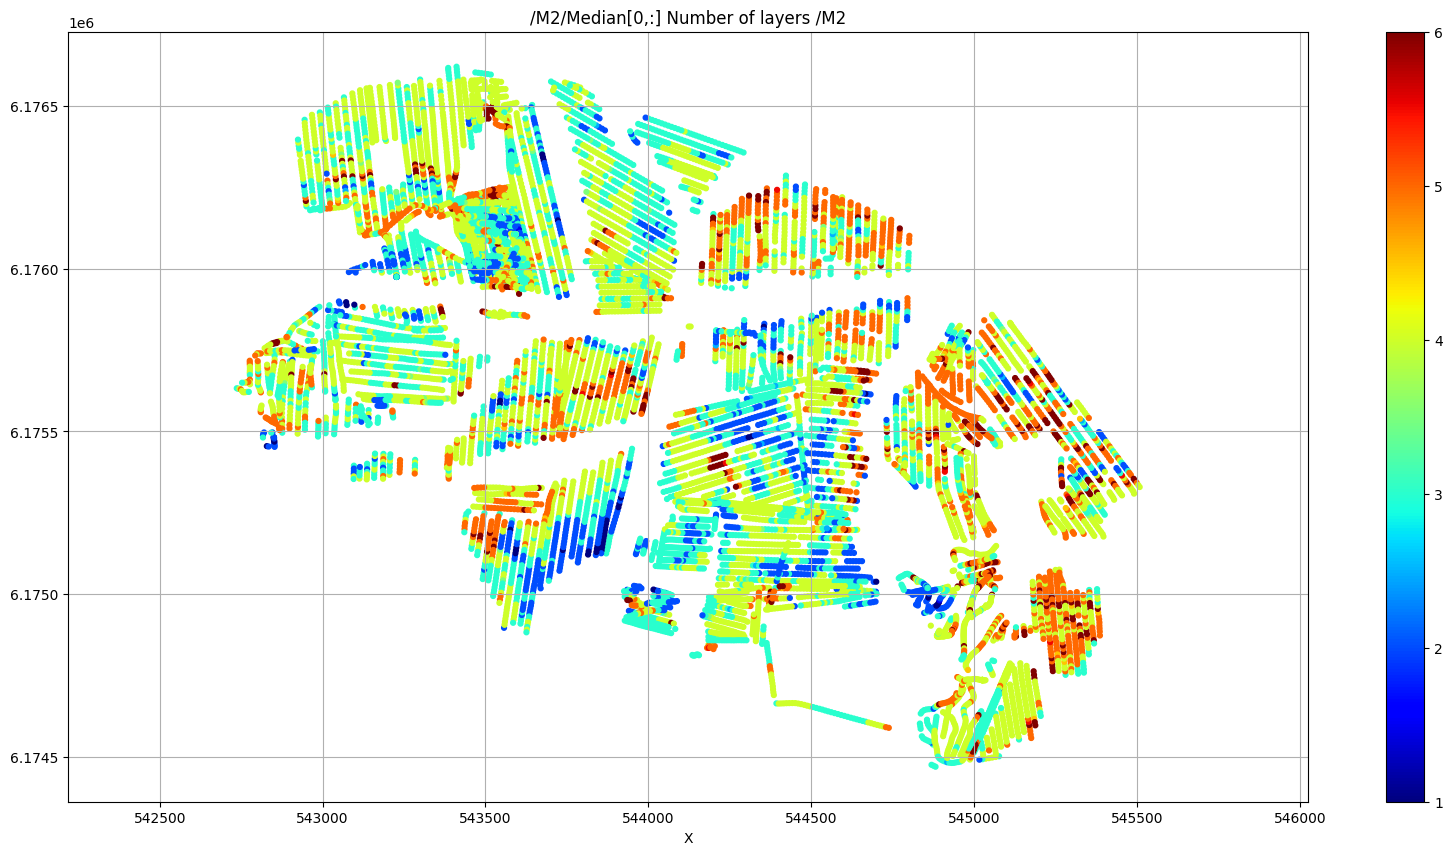

In [12]:

# Plot a 2D feature: Resistivity in layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=12, key='Median', uselog=1, cmap='jet', s=10)
#ig.plot_feature_2d(f_post_h5,im=1,iz=80,key='Median')

try:
    # Plot a 2D feature: The number of layers
    ig.plot_feature_2d(f_post_h5,im=2,iz=0,key='Median', title_text = 'Number of layers', uselog=0, clim=[1,6], cmap='jet', s=12)
except:
    pass